<a href="https://colab.research.google.com/github/Sjnjerak/GCP-Public-Health-Data-Agent/blob/main/Public_Health_Agent_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Public Health Agent: Initial Data Exploration

## Authenticate Users

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set Up BigQuery Magic

In [2]:
# Step 1: Load the BigQuery magic extension.
# You only need to run this once per notebook session.
%load_ext bigquery_magics

# Step 2: Set your default project ID (optional but recommended).
# The magic will use the project from your gcloud config, but setting it
# here makes your notebook's dependencies clear.
# Replace 'your-gcp-project-id' with your actual project ID.
%env GCLOUD_PROJECT=public-health-agent

env: GCLOUD_PROJECT=public-health-agent


## Explore data

In [3]:
%%bigquery demo_1999_2000

SELECT
  *
FROM
  `public-health-agent.nhanes_data.DEMO_1999_2000`

### Basic DataFrame Information

In [16]:
demo_1999_2000.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,7655.0,1.0,2.0,1.0,2.0,1.700000e+01,206.0,206.0,1.0,3.0,...,982.298179,974.665252,974.665252,985.995911,984.405487,5.397605e-79,975.834245,978.609142,974.665252,974.665252
1,5646.0,1.0,2.0,1.0,1.0,5.397605e-79,2.0,4.0,1.0,3.0,...,1190.080759,1169.303209,1169.303209,1190.736034,1192.576418,1.238550e+03,1172.664505,1176.465152,1169.303209,1169.303209
2,6250.0,1.0,2.0,1.0,2.0,5.397605e-79,1.0,2.0,1.0,3.0,...,1211.297952,1188.618031,1188.618031,1210.979884,1212.241124,1.244960e+03,1192.423907,1195.898277,1188.618031,1188.618031
3,8240.0,1.0,2.0,1.0,2.0,5.397605e-79,5.0,6.0,1.0,3.0,...,1211.297952,1188.618031,1188.618031,1210.979884,1212.241124,5.397605e-79,1192.423907,1195.898277,1188.618031,1188.618031
4,4582.0,1.0,2.0,1.0,2.0,5.397605e-79,4.0,5.0,1.0,3.0,...,1217.760701,1196.499888,1196.499888,1218.431217,1219.598919,1.269553e+03,1199.939364,1203.828411,1196.499888,1196.499888


In [17]:
demo_1999_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Columns: 144 entries, SEQN to WTIREP52
dtypes: float64(144)
memory usage: 10.9 MB


In [18]:
demo_1999_2000.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
count,9965.00000,9965.0,9965.000000,9282.000000,9965.000000,9.965000e+03,9.792000e+03,9.141000e+03,9965.000000,9965.000000,...,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03,9.965000e+03
mean,4983.00000,1.0,1.931460,1.578755,1.509985,2.972885e+01,3.505125e+02,3.453502e+02,2.561365,2.231912,...,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04,2.731127e+04
std,2876.79205,0.0,0.252683,0.493785,0.499925,2.483034e+01,2.871369e+02,2.835316e+02,1.268133,1.130267,...,3.066563e+04,3.059885e+04,3.104360e+04,3.084997e+04,3.072292e+04,3.018730e+04,3.038488e+04,3.043739e+04,3.090548e+04,3.050680e+04
min,1.00000,1.0,1.000000,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,1.000000,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,2492.00000,1.0,2.000000,1.000000,1.000000,1.100000e+01,1.290000e+02,1.290000e+02,1.000000,1.000000,...,5.872353e+03,5.825400e+03,5.736731e+03,5.806160e+03,5.823603e+03,5.988851e+03,5.887751e+03,5.908788e+03,5.812202e+03,5.803129e+03
50%,4983.00000,1.0,2.000000,2.000000,2.000000,1.900000e+01,2.310000e+02,2.280000e+02,3.000000,2.000000,...,1.332996e+04,1.314435e+04,1.260277e+04,1.302947e+04,1.313675e+04,1.338385e+04,1.324170e+04,1.331969e+04,1.299869e+04,1.348375e+04
75%,7474.00000,1.0,2.000000,2.000000,2.000000,4.800000e+01,5.620000e+02,5.500000e+02,4.000000,3.000000,...,3.936584e+04,3.952415e+04,4.010336e+04,3.978673e+04,3.983970e+04,3.949601e+04,3.994890e+04,3.911846e+04,3.938695e+04,4.003671e+04
max,9965.00000,1.0,2.000000,2.000000,2.000000,8.500000e+01,1.019000e+03,1.019000e+03,5.000000,5.000000,...,2.393207e+05,2.375718e+05,2.357504e+05,2.418343e+05,2.327390e+05,2.371475e+05,2.370761e+05,2.383602e+05,2.366490e+05,2.369642e+05


### Data Cleaning and Relabeling

In [19]:
demo_1999_2000_cleaned = demo_1999_2000.copy()
demo_1999_2000_cleaned.rename(columns={
    'SEQN': 'Respondent sequence number',
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview and examination status',
    'RIDEXMON': 'Six-month time period',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening',
    'RIDAGEEX': 'Age in months at exam',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH2': 'Race/Hispanic origin (re-coded)',
    'DMQMILIT': 'Served in US Armed Forces',
    'DMDBORN': 'Country of birth',
    'DMDCITZN': 'Citizenship status',
    'DMDYRSUS': 'Years in US',
    'DMDEDUC3': 'Education level - Children/Youth (re-coded)',
    'DMDEDUC2': 'Education level - Adults 20+ (re-coded)',
    'DMDEDUC': 'Education level - Children/Youth',
    'DMDSCHOL': 'Now attending school?',
    'DMDMARTL': 'Marital status',
    'DMDHHSIZ': 'Total number of people in household',
    'INDHHINC': 'Total household income (re-coded)',
    'INDFMINC': 'Total family income (re-coded)',
    'INDFMPIR': 'Family poverty income ratio',
    'RIDEXPRG': 'Pregnancy status - Exam',
    'RIDPREG': 'Pregnancy status - Reported',
    'DMDHRGND': 'Household reference person - Gender',
    'DMDHRAGE': 'Household reference person - Age',
    'DMDHRBRN': 'Household reference person - Country of birth',
    'DMDHREDU': 'Household reference person - Education level',
    'DMDHRMAR': 'Household reference person - Marital status',
    'DMDHSEDU': 'Spouse - Education level',
    'WTINT2YR': 'Interview weight - 2 year',
    'WTINT4YR': 'Interview weight - 4 year',
    'WTMEC2YR': 'Exam weight - 2 year',
    'WTMEC4YR': 'Exam weight - 4 year',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'SDMVSTRA': 'Masked variance pseudo-stratum'
}, inplace=True)

demo_1999_2000_cleaned['Gender'] = demo_1999_2000_cleaned['Gender'].map({1: 'Male', 2: 'Female'})
demo_1999_2000_cleaned['Race/Hispanic origin'] = demo_1999_2000_cleaned['Race/Hispanic origin'].map({
    1: 'Mexican American',
    2: 'Other Hispanic',
    3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black',
    5: 'Other Race - Including Multi-Racial'
})
demo_1999_2000_cleaned['Served in US Armed Forces'] = demo_1999_2000_cleaned['Served in US Armed Forces'].map({
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: "Don't know"
})
demo_1999_2000_cleaned['Citizenship status'] = demo_1999_2000_cleaned['Citizenship status'].map({
    1: 'Citizen by birth or naturalization',
    2: 'Not a citizen of the US',
    7: 'Refused',
    9: "Don't know"
})
demo_1999_2000_cleaned['Now attending school?'] = demo_1999_2000_cleaned['Now attending school?'].map({
    1: 'Yes',
    2: 'No',
    3: 'On summer vacation',
    7: 'Refused',
    9: "Don't know"
})
demo_1999_2000_cleaned['Marital status'] = demo_1999_2000_cleaned['Marital status'].map({
    1: 'Married',
    2: 'Widowed',
    3: 'Divorced',
    4: 'Separated',
    5: 'Never married',
    6: 'Living with partner',
    77: 'Refused',
    99: "Don't know"
})

demo_1999_2000_cleaned.head()

,Respondent sequence number,Data release cycle,Interview and examination status,Six-month time period,Gender,Age in years at screening,Age in months at screening,Age in months at exam,Race/Hispanic origin,Race/Hispanic origin (re-coded),...,WTIREP43,WTIREP44,WTIREP45,WTIREP46,WTIREP47,WTIREP48,WTIREP49,WTIREP50,WTIREP51,WTIREP52
0,7655.0,1.0,2.0,1.0,Female,1.700000e+01,206.0,206.0,Mexican American,3.0,...,982.298179,974.665252,974.665252,985.995911,984.405487,5.397605e-79,975.834245,978.609142,974.665252,974.665252
1,5646.0,1.0,2.0,1.0,Male,5.397605e-79,2.0,4.0,Mexican American,3.0,...,1190.080759,1169.303209,1169.303209,1190.736034,1192.576418,1.238550e+03,1172.664505,1176.465152,1169.303209,1169.303209
2,6250.0,1.0,2.0,1.0,Female,5.397605e-79,1.0,2.0,Mexican American,3.0,...,1211.297952,1188.618031,1188.618031,1210.979884,1212.241124,1.244960e+03,1192.423907,1195.898277,1188.618031,1188.618031
3,8240.0,1.0,2.0,1.0,Female,5.397605e-79,5.0,6.0,Mexican American,3.0,...,1211.297952,1188.618031,1188.618031,1210.979884,1212.241124,5.397605e-79,1192.423907,1195.898277,1188.618031,1188.618031
4,4582.0,1.0,2.0,1.0,Female,5.397605e-79,4.0,5.0,Mexican American,3.0,...,1217.760701,1196.499888,1196.499888,1218.431217,1219.598919,1.269553e+03,1199.939364,1203.828411,1196.499888,1196.499888


### Visualizations

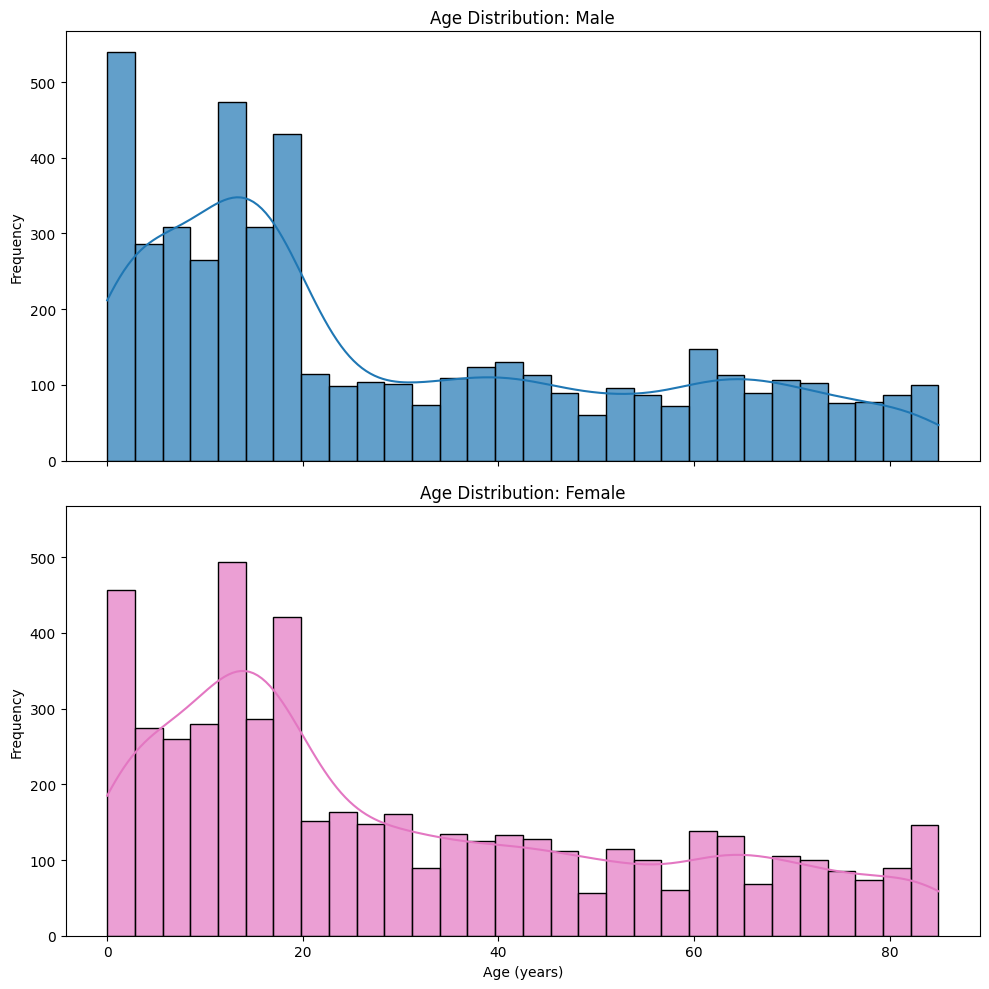

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=True)

genders = ['Male', 'Female']
for ax, gender in zip(axes, genders):
    sns.histplot(
        data=demo_1999_2000_cleaned[demo_1999_2000_cleaned['Gender'] == gender],
        x='Age in years at screening',
        bins=30,
        kde=True,
        color='tab:blue' if gender == 'Male' else 'tab:pink',
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f'Age Distribution: {gender}')
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

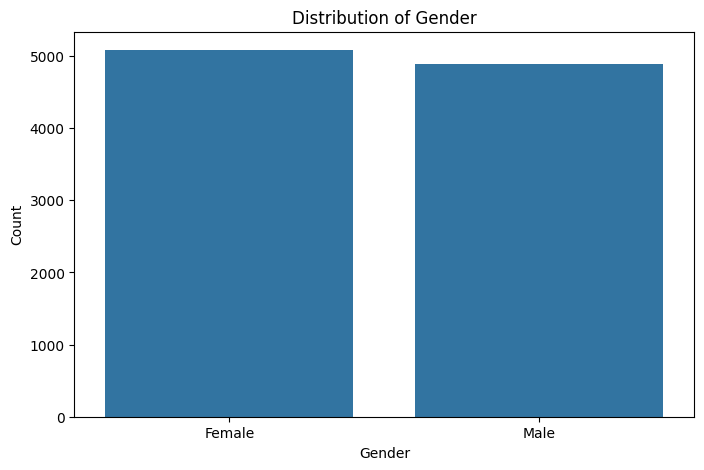

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=demo_1999_2000_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

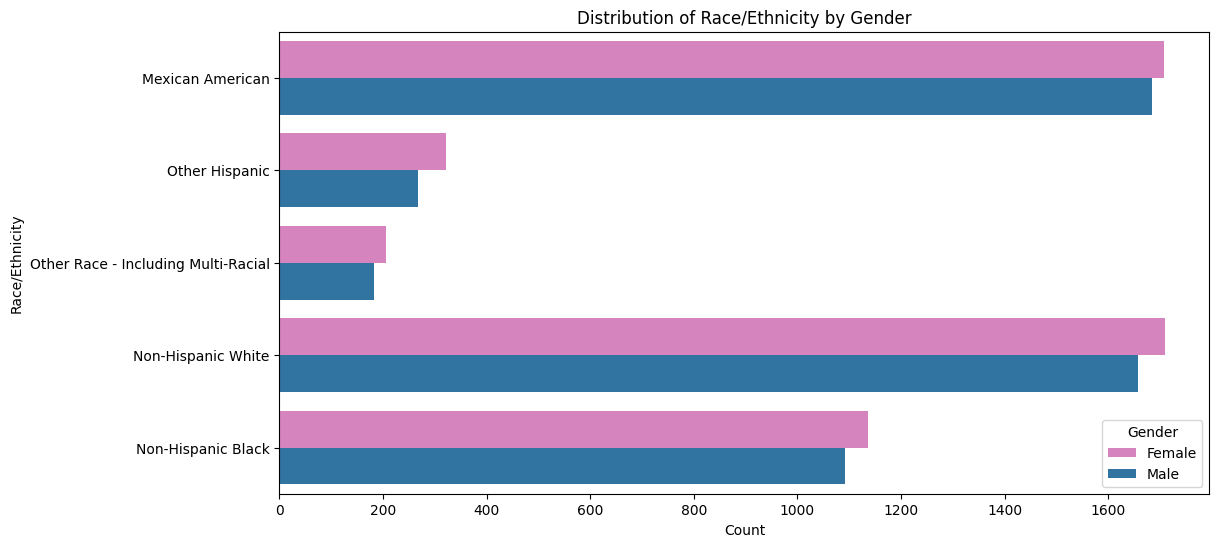

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y='Race/Hispanic origin',
    data=demo_1999_2000_cleaned,
    hue='Gender',
    palette={'Male': 'tab:blue', 'Female': 'tab:pink'}
)
plt.title('Distribution of Race/Ethnicity by Gender')
plt.xlabel('Count')
plt.ylabel('Race/Ethnicity')
plt.legend(title='Gender')
plt.show()